In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\gfs_bom_loc_1.csv")


In [2]:
# Setting UtcTime as the index
df.set_index("Unnamed: 0", inplace=True)

In [3]:
# Dropping variables that are not used for training
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

# Change units 
df.pred_temp = df.pred_temp - 273.15 # Kelvin to Celsius
df.pred_dewp = df.pred_dewp - 273.15 # Kelvin to Celsius


In [4]:
# If you want to remove some features, 
# Initially, just select the following variables


In [5]:
print df.columns
print 'Total number of columns = %d' %(len(df.columns))

Index([u'Temperature', u'FeelsLike', u'DewPoint', u'RelativeHumidity',
       u'WindSpeed', u'WindGust', u'RainSince9am', u'Pressure',
       u'RainfallLastHour', u'RainfallLast10Minutes', u'pred_cloud_cover',
       u'pred_dewp', u'pred_lw_rad', u'pred_merid_wind', u'pred_pe',
       u'pred_rain_rate', u'pred_soil_moisture_lower',
       u'pred_soil_moisture_upper', u'pred_sunshine', u'pred_surface_pressure',
       u'pred_sw_rad', u'pred_temp', u'pred_zonal_wind'],
      dtype='object')
Total number of columns = 23


In [6]:
# Generate df for gt label (Y)
df_gt_output = pd.DataFrame(df.Temperature)

# Rename dataframe for data matrix (X)
df_data = df

In [7]:
# Add temp for the next 7-days
for hrs in range(1,169):
    col_name = 'y_t_'+str(hrs)
    df_gt_output[col_name] = df_gt_output.Temperature.shift(-hrs)
    # print col_name

# Now remove the current temperature from this dataframe
df_gt_output = df_gt_output.drop('Temperature', axis=1)

In [8]:
# df_data.columns
df.columns

Index([u'Temperature', u'FeelsLike', u'DewPoint', u'RelativeHumidity',
       u'WindSpeed', u'WindGust', u'RainSince9am', u'Pressure',
       u'RainfallLastHour', u'RainfallLast10Minutes', u'pred_cloud_cover',
       u'pred_dewp', u'pred_lw_rad', u'pred_merid_wind', u'pred_pe',
       u'pred_rain_rate', u'pred_soil_moisture_lower',
       u'pred_soil_moisture_upper', u'pred_sunshine', u'pred_surface_pressure',
       u'pred_sw_rad', u'pred_temp', u'pred_zonal_wind'],
      dtype='object')

In [9]:
# Get the observation from past one day
past_hours = 25
for current_col in df.columns:
    print 'processing %s' %(current_col)
    for hr in range(1,past_hours):
        col_name = current_col+'_past'+str(hr)+'hr'
        df_data[col_name] = df[current_col].shift(hr)
        print col_name
    

processing Temperature
Temperature_past1hr
Temperature_past2hr
Temperature_past3hr
Temperature_past4hr
Temperature_past5hr
Temperature_past6hr
Temperature_past7hr
Temperature_past8hr
Temperature_past9hr
Temperature_past10hr
Temperature_past11hr
Temperature_past12hr
Temperature_past13hr
Temperature_past14hr
Temperature_past15hr
Temperature_past16hr
Temperature_past17hr
Temperature_past18hr
Temperature_past19hr
Temperature_past20hr
Temperature_past21hr
Temperature_past22hr
Temperature_past23hr
Temperature_past24hr
processing FeelsLike
FeelsLike_past1hr
FeelsLike_past2hr
FeelsLike_past3hr
FeelsLike_past4hr
FeelsLike_past5hr
FeelsLike_past6hr
FeelsLike_past7hr
FeelsLike_past8hr
FeelsLike_past9hr
FeelsLike_past10hr
FeelsLike_past11hr
FeelsLike_past12hr
FeelsLike_past13hr
FeelsLike_past14hr
FeelsLike_past15hr
FeelsLike_past16hr
FeelsLike_past17hr
FeelsLike_past18hr
FeelsLike_past19hr
FeelsLike_past20hr
FeelsLike_past21hr
FeelsLike_past22hr
FeelsLike_past23hr
FeelsLike_past24hr
processing Dew

In [10]:
df_data.columns

Index([u'Temperature', u'FeelsLike', u'DewPoint', u'RelativeHumidity',
       u'WindSpeed', u'WindGust', u'RainSince9am', u'Pressure',
       u'RainfallLastHour', u'RainfallLast10Minutes',
       ...
       u'pred_zonal_wind_past15hr', u'pred_zonal_wind_past16hr',
       u'pred_zonal_wind_past17hr', u'pred_zonal_wind_past18hr',
       u'pred_zonal_wind_past19hr', u'pred_zonal_wind_past20hr',
       u'pred_zonal_wind_past21hr', u'pred_zonal_wind_past22hr',
       u'pred_zonal_wind_past23hr', u'pred_zonal_wind_past24hr'],
      dtype='object', length=575)

In [11]:
# df_data.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_dfdata.csv")
# df_gt_output.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_df_gt_output.csv")


In [12]:
# df_data

In [13]:
# df_gt_output

In [14]:
# Combine data and temp forecast for the next seven days and filter nan
df_combined = pd.concat([df_data,df_gt_output], axis=1)
df_combined = df_combined.dropna()

# Get the list of column names
data_columns = df_combined.columns[0:575]
gt_temp_columns = df_combined.columns[575:]

# create new dataframe for data and forecast
df_data_nan_filtered = df_combined[data_columns]
df_gt_output_nan_filtered = df_combined[gt_temp_columns]


In [15]:
df_combined.columns[0:575]

Index([u'Temperature', u'FeelsLike', u'DewPoint', u'RelativeHumidity',
       u'WindSpeed', u'WindGust', u'RainSince9am', u'Pressure',
       u'RainfallLastHour', u'RainfallLast10Minutes',
       ...
       u'pred_zonal_wind_past15hr', u'pred_zonal_wind_past16hr',
       u'pred_zonal_wind_past17hr', u'pred_zonal_wind_past18hr',
       u'pred_zonal_wind_past19hr', u'pred_zonal_wind_past20hr',
       u'pred_zonal_wind_past21hr', u'pred_zonal_wind_past22hr',
       u'pred_zonal_wind_past23hr', u'pred_zonal_wind_past24hr'],
      dtype='object', length=575)

In [16]:
# df_data_nan_filtered.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_dfdata.csv")
# df_gt_output_nan_filtered.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_df_gt_output.csv")


In [17]:
df_data_matrix = df_data_nan_filtered.as_matrix()
df_gt_temp_forecast_matrix = df_gt_output_nan_filtered.as_matrix()

In [18]:
print df_data_matrix.shape
print df_gt_temp_forecast_matrix.shape

(3979L, 575L)
(3979L, 168L)


In [19]:
df_data_nan_filtered

,Temperature,FeelsLike,DewPoint,RelativeHumidity,WindSpeed,WindGust,RainSince9am,Pressure,RainfallLastHour,RainfallLast10Minutes,...,pred_zonal_wind_past15hr,pred_zonal_wind_past16hr,pred_zonal_wind_past17hr,pred_zonal_wind_past18hr,pred_zonal_wind_past19hr,pred_zonal_wind_past20hr,pred_zonal_wind_past21hr,pred_zonal_wind_past22hr,pred_zonal_wind_past23hr,pred_zonal_wind_past24hr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-06-29 14:00:00,11.200000,8.500000,5.600000,68.000000,24.000000,33.000000,0.000000,1013.000000,0.000000,0.000000,...,1.910000,1.820000,1.730000,1.083333,0.436667,-0.210000,1.103333,2.416667,3.730000,3.143333
2016-06-29 15:00:00,10.500000,9.000000,5.700000,72.000000,11.000000,15.000000,0.000000,1012.000000,0.000000,0.000000,...,2.000000,1.910000,1.820000,1.730000,1.083333,0.436667,-0.210000,1.103333,2.416667,3.730000
2016-06-29 16:00:00,11.400000,9.300000,5.600000,67.000000,18.000000,26.000000,0.000000,1011.000000,0.000000,0.000000,...,2.683333,2.000000,1.910000,1.820000,1.730000,1.083333,0.436667,-0.210000,1.103333,2.416667
2016-06-29 17:00:00,11.300000,8.800000,4.700000,64.000000,22.000000,33.000000,0.000000,1010.000000,0.000000,0.000000,...,3.366667,2.683333,2.000000,1.910000,1.820000,1.730000,1.083333,0.436667,-0.210000,1.103333
2016-06-29 18:00:00,11.100000,8.900000,1.700000,52.000000,18.000000,30.000000,0.000000,1008.000000,0.000000,0.000000,...,4.050000,3.366667,2.683333,2.000000,1.910000,1.820000,1.730000,1.083333,0.436667,-0.210000
2016-06-29 19:00:00,10.700000,8.200000,2.300000,56.000000,20.000000,30.000000,0.000000,1008.000000,0.000000,0.000000,...,3.103333,4.050000,3.366667,2.683333,2.000000,1.910000,1.820000,1.730000,1.083333,0.436667
2016-06-29 20:00:00,11.000000,8.800000,3.300000,59.000000,18.000000,33.000000,0.000000,1008.000000,0.000000,0.000000,...,2.156667,3.103333,4.050000,3.366667,2.683333,2.000000,1.910000,1.820000,1.730000,1.083333
2016-06-29 21:00:00,10.500000,8.300000,4.500000,66.000000,17.000000,33.000000,0.000000,1007.000000,0.000000,0.000000,...,1.210000,2.156667,3.103333,4.050000,3.366667,2.683333,2.000000,1.910000,1.820000,1.730000
2016-06-29 22:00:00,11.100000,8.600000,4.700000,65.000000,22.000000,35.000000,0.000000,1006.000000,0.000000,0.000000,...,0.913333,1.210000,2.156667,3.103333,4.050000,3.366667,2.683333,2.000000,1.910000,1.820000


In [20]:
tot_points = df_data_matrix.shape[0]
train_points = 2350 # training until September
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

(3979L, 2350, 1629L)


In [21]:
# Generate Train Sequence
x_train = df_data_matrix[0:train_points + 1,:]
y_train = df_gt_temp_forecast_matrix[0:train_points + 1,:]
# Generate Test Sequence
x_test = df_data_matrix[train_points + 1:tot_points + 1 ,:]
y_test = df_gt_temp_forecast_matrix[train_points + 1:tot_points + 1 ,:]

print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(2351L, 575L) (2351L, 168L)
(1628L, 575L) (1628L, 168L)


In [22]:
# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_train = scaler_minmax.fit_transform(x_train)

x_test_minmax = scaler_minmax.transform(x_test)

# Add polynomials
# poly = PolynomialFeatures(degree=2, interaction_only=True)
# x_train = poly.fit_transform(x_train)


In [23]:
print x_train.shape, x_train.shape[0], x_train.shape[1]

(2351L, 575L) 2351 575


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

Using Theano backend.


In [25]:
# create model
model = Sequential()
model.add(Dense(10000, input_dim=x_train.shape[1], init='normal', activation='relu')) #1st Hidden Layer
model.add(Dense(5000, init='normal', activation='relu')) #2nd Hidden Layer
model.add(Dense(2500, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(1000, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(168, init='normal')) #output layer
    
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
# model.fit(x_train, y_train, nb_epoch=20, verbose=1, batch_size = 250, shuffle=True)
model.fit(x_train, y_train, nb_epoch=20, verbose=1, validation_data=(x_test_minmax, y_test), batch_size = 20, shuffle=True)

Train on 2351 samples, validate on 1628 samples
Epoch 1/20
2351/2351 [==============================] - 83s - loss: 6.8300 - val_loss: 17.4454
Epoch 2/20
2351/2351 [==============================] - 83s - loss: 5.5905 - val_loss: 17.6355
Epoch 3/20
2351/2351 [==============================] - 102s - loss: 5.0179 - val_loss: 17.3018
Epoch 4/20
2351/2351 [==============================] - 145s - loss: 4.0472 - val_loss: 18.4934
Epoch 5/20
2351/2351 [==============================] - 648s - loss: 3.7179 - val_loss: 18.6737
Epoch 6/20
2351/2351 [==============================] - 611s - loss: 3.1245 - val_loss: 20.1645
Epoch 7/20
2351/2351 [==============================] - 466s - loss: 2.6029 - val_loss: 19.8785
Epoch 8/20
2351/2351 [==============================] - 499s - loss: 2.3033 - val_loss: 20.0067
Epoch 9/20
2351/2351 [==============================] - 496s - loss: 1.9965 - val_loss: 21.1271
Epoch 10/20
2351/2351 [==============================] - 475s - loss: 1.7366 - val_loss: 2

In [47]:
# model.save('C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\learning\\time_series\\feed_forward_nn\\models\\v4_s2.h5')

In [48]:
model.predict(x_test_minmax)
pred_array = model.predict(x_test_minmax)

In [49]:
pred_array[0,:].shape

(168L,)

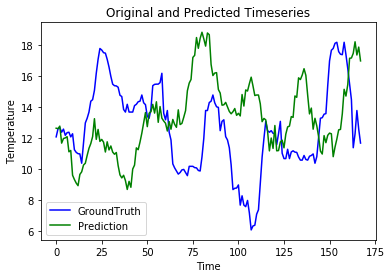

In [58]:
test_ind = 8;
y_gt_vec = y_test[test_ind,:]
y_pred_vec = pred_array[test_ind,:]

# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(0,168,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
# plt.ylim(ymin=5)
# plt.ylim(ymax=20)
plt.legend()
plt.title('Original and Predicted Timeseries')

In [59]:
pred_train_set_array = model.predict(x_train)
print pred_train_set_array.shape

(2351L, 168L)


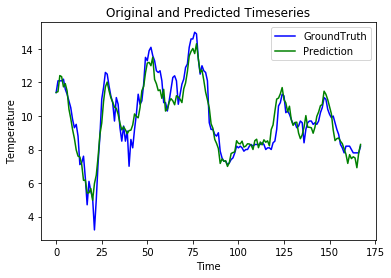

In [70]:
test_ind = 9;
y_gt_vec = y_train[test_ind,:]
y_pred_vec = pred_train_set_array[test_ind,:]

# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(0,168,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
# plt.ylim(ymin=5)
# plt.ylim(ymax=20)
plt.legend()
plt.title('Original and Predicted Timeseries')

In [141]:
np.sqrt(sum_of_square(y_gt_vec,y_pred_vec))

27.1852768786834

In [66]:
num_train = x_train.shape[0]
num_test = x_test.shape[0]

print "train = %d test = %d" %( num_train, num_test )

# Calc loss over training set
train_error = 0.0
train_error_hist=[]
for data_instance in range(0,num_train):
    y_gt_vec = y_train[data_instance,:]
    y_pred_vec = pred_train_set_array[data_instance,:]
    sq_err = np.sqrt(sum_of_square(y_gt_vec,y_pred_vec))
    train_error_hist.append(sq_err)
    train_error = train_error + sq_err
print "train_error = %f" %( train_error )

# Calc loss over test set
test_error = 0.0
test_error_hist=[]
for data_instance in range(0,num_test):
    y_gt_vec = y_test[data_instance,:]
    y_pred_vec = pred_array[data_instance,:]
    sq_err = np.sqrt(sum_of_square(y_gt_vec,y_pred_vec))
    test_error_hist.append(sq_err)
    test_error = test_error + sq_err
print "test_error = %f" %( test_error )

    


train = 2351 test = 1628
train_error = 28360.247514
test_error = 94722.803511


In [69]:
train_error_hist

[14.485666799439148,
 12.97269182026446,
 11.555556202931475,
 11.413365800179758,
 11.334189114460349,
 10.961928447119892,
 10.501048820945543,
 9.8516711809517972,
 9.3565068758195853,
 9.2129233093991374,
 9.3380671936367037,
 9.2001563167680001,
 9.426165733813276,
 9.5392988321838956,
 8.9989387923953057,
 8.7735414612666478,
 8.751219267716241,
 8.9320864779767621,
 9.1486513599167143,
 8.5728881941181871,
 9.1943200642024063,
 9.193982080735049,
 9.0182558397278161,
 9.3588625210206775,
 9.8844102052296119,
 9.8562079749151188,
 9.7670172417668688,
 9.4609244309363625,
 8.9377556372604587,
 8.5915568338461519,
 8.3167238805240036,
 9.1082945700722409,
 9.0359587207367191,
 9.4819934031679765,
 9.3854292384378279,
 9.0238809758460974,
 8.6371153964406773,
 8.4738278675823011,
 8.1835116830712966,
 8.5222834617341139,
 9.1460781155936068,
 9.2337484398592036,
 8.5862725731054788,
 8.2851000732437825,
 8.7075444745354194,
 8.327348993099271,
 8.195604021699662,
 8.0791254529744467